<center> <h2> DS 3000 - Fall 2021</h2> </center>
<center> <h3> DS Report </h3> </center>

<center> <h3>Predicting Start Up Success</h3> </center>
<center><h4>Shaun Khundker, Terry Chen, Lauren MacIver</h4></center>

<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

The startup ecosystem is quickly adapting and expanding as the rise of new technology creates new opportunities for business. This trend is suggestive of greater opportunities within the venture capital ecosystem to fund potential successful companies and unlock high profits; however, the subjectiveness of human intuition leaves investors at high risk of loss due to inaccurate perception startup potential. Therefore, we aim to leverage startup data to try and provide a concrete approach to startup success prediction. The data used was originally pulled from Crunchbase, a private and public company information platform and details variables such as funding amounts across funding rounds, location, and industry. Three algorithms were tested for this supervised binary classification problem - kNN, Support Vector Machines, and Decision Trees. K-Nearest Neighbors offered the highest performance and was was hyperparameter tuned to consider 20 neighbors in classification. The final optimized model performance was ~.71 with precision and recall scores of ~.69 and ~.65 respectively, demonstrating opportunity to further refine the model with new feature variables and data in the future to more accurately predict startup success and failure. 


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION



<h4>Problem Statement</h4>

Investors aim to identify unicorn companies with high valuations among a large pool of investment options. Venture capitalism has historically been focused on sourcing relationships with founders, conducting due diligence, and often basing investment decisions on intuition and experience rather than data. With the increased availability of start up information, we aim to develop a concrete model to support investors in determining the likelihood of start up success. We hope to gain a greater understanding of the key considerations of due diligence and how to best leverage these data points to create an accurate predictive model. 

<h4>Significance of the Problem</h4>

Historically, failure is a costly but effective way to train a venture capitalist. With increased access to data surrounding early stage companies, leveraging machine learning models in venture capital is a powerful mechanism to supplement an intuition based industry. The insights from this project would allow for an increased rate of identification of potential unicorn companies that ultimately improve product offerings to consumers. When coupled with proper data and human intuition, machine learning models in venture capital can challenge biases and improve  accuracy in predicting start-up potential. Many firms are already shifting to a data driven approach and have seen successful returns in response. However, the majority of firms utilize these datasets as search engines to locate potential deals leaving a demand for machine learning models that identify key indicators of potential unicorn companies in early stage investments. 







<h4>Questions</h4>

Given the aforementioned problem and its importance, we set out to tackle the following questions: 

* Can we predict whether a startup suceeds (is acquired) or fails (closes down) based on some characteristics of the startup?
* Is k-Nearest Neighbors better than Support Vector Machines and Decision Trees in predicting start up success based on performance accuracy?
* Which features most greatly influence the outcome variable? Are there a subset of features that are strongly correlated to the target?
* Will feature selection improve overall model performance?

<h4>Hypotheses</h4>

Null: The success of a startup and its funding features have no relationship (H1,0). 

Alternative: The success of a startup and its funding features have a relationship (H1,1). 

Null: The success of a startup and the market that it is in have no relationship (H2, 0). 

Alternative: The success of a startup and the market that it is in have a relationship (H2, 1). 



<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition
The dataset was obtained using [Kaggle](https://www.kaggle.com/arindam235/startup-investments-crunchbase) and contains information intially pulled from Crunchbase, an information platform for public and private company data. The dataset contains 54294 samples of startups and 30 variables as described below. Status is the outcome variable.

| **Variable** | **Description** |  

| --- | --- | --- |

| name | name of startup |

| market | industry of startup |

| funding_total | total funding raised by startup in USD |

| state_code | the state in which the startup is located |

| funding_rounds | number of funding rounds |

| founded_at | date (year/month/date) the startup was founded|

| first_funding_at | date (year/month/date) the startup got its first funding |

| last_funding_at | date (year/month/date) the startup got its last funding |

| seed | funding raised during seed round in USD |

| venture | total venture funding amount |

| undisclosed | undisclosed funding in USD |

| convertible_note | funding raised using convertible notes in USD |

| debt_financing | total debt financing amount in USD |

| angel | funding raised by angles in USD |

| grant | funding raised through grants in USD |

| private_equity | funding raised by private equity in USD |

| post_ipo_equity |amount of funding raised after going public in USD|

| post_ipo_debt |amount of debt financing after going public in USD |

| secondary_market |amount of funding raised through secondary market in USD |

| product_crowdfunding |amount of funding raised through product crowdfunding in USD|

| round A |amount of funding raised from round A in USD |

| round B |amount of funding raised from round B in USD |

| round C |amount of funding raised from round C in USD |

| round D |amount of funding raised from round D in USD |

| round E |amount of funding raised from round E in USD |

| round F |amount of funding raised from round F in USD |

| round G |amount of funding raised from round G in USD |

| round H |amount of funding raised from round H in USD |

| *status* | *whether the startup is acquired or closed* |

### 2.2. Data Analysis

* **What machine learning algorithms are you going to use? Why? You should list at least three algorithms. Provide a brief description of each algorithm and explain why you think they are appropriate for your data.**

As mentioned above, this project aims to predict start up status (closed or acquired), the outcome variable. The remaining 29 feature variables are important predictors as they provide additional information on aspects that can play a significant role in a startup's ability to succeed such as funding totals and different funding rounds, market, and state of origin. 

This is a supervised machine learning problem as we will be developing a predictive model based on both input data (labeled start up feature variables) and output data (start up status). Our project is tackling a classification problem because we are predicting which startups will succeed given a set of labeled feature variables like the amount of funding raised. Our target label, whether the startups succeed or not, is binary and categorical and therefore a classification problem. 

We are planning to try k-Nearest Neighbors, Linear SVC and Decision Trees. We choose these three algorithms as they are classification algorithms covered in class that suit the needs of our project. We chose not to use Naive Bayes because we were not confident that each of the features are equally important. In the model training section of this report, we test all these aforementioned algorithms to determine which will perform best as we prior to training we have no reason to believe one will be better than another. The K-Nearest Neighbors algorithm is one of the simplest machine learning models and has very few hyperparamters to tune(K value and distance function). The algorithm relies on the underlying assumption that items in close proximity to one another are similar and leverages distance to classify new samples. Linear Support Vector Classification attempts to draw a hyperplane in which the support vector margins are as large as possible. The support vectors are the most useful data points because they are the ones most likely to be incorrectly classified. Part of the reasoning behind including SVM was because it can handle outliers better than most other models. On the other hand, decision trees are rule based classifiers that assume that initially, at the root, all the training data is examined. The data is continually split until all data points are isolated to a class. We included decision trees as one of our models because it is highly effective in handling colinearity which is a possibility we wanted to be mindful of in our dataset. We are going to try all these because we do not have reason to think that one is better than the other; however, we have chosen to omit the Naive Bayes algorithm because features are not all equally important. 



<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling


In [61]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/shaunkh/DSFinalProject/main/investments_VC.csv?token=AWG2IGQOBKUDSCUJAYKYD4TBXQEEC", encoding= 'unicode_escape')
df

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.1.2 Data Cleaning
In this section we remove unnecessary columns to that will not contribute to model accuracy, dropna samples, and rename columns for simplicity. These modifications will ensure that there are relevant values for each of our feature variables that can be used in training and testing the model. The scope of this project is only startups within the United States. 

In [20]:
# clean data, drop NA values for our target variable
df = df.dropna(subset=['status'], axis = 0)

# Drop unecessary columns
df = df.drop(['permalink', 'homepage_url', 'category_list', 'founded_month', 'founded_quarter','founded_year',
             'founded_at', 'first_funding_at', 'last_funding_at'], axis = 1)

# Limit data to only USA
df = df[df["country_code"] == "USA"]

# Keep only rows that are 'acquired' or 'closed'
df = df[df["status"] != "operating"]

# Rename columns for ease of use
df = df.rename({' market ': 'market', ' funding_total_usd ': 'funding_total_usd'}, axis=1)

# can we move this to the data cleaning section?
df = df.drop(["country_code", "region", "city"], axis=1)
df = df.dropna(subset=['state_code'], axis = 0)
df = df.dropna(subset=['market'], axis = 0)

df = df.astype({'market': 'str', 'name': 'str', 'status': 'str', 'state_code': 'str'})

df

,name,market,funding_total_usd,status,state_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,News,"17,50,000",acquired,NY,1.0,1750000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,1000memories,Curated Web,"25,35,000",acquired,CA,2.0,15000.0,2520000.0,0.0,0.0,...,0.0,0.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,100Plus,Analytics,"12,50,000",acquired,CA,2.0,750000.0,500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,10BestThings,Curated Web,"50,000",closed,OH,1.0,50000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,12Society,E-Commerce,-,acquired,CA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49394,Zuujit,E-Commerce,"27,00,000",closed,CA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49395,zuuka!,Apps,-,acquired,CA,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49400,Zvents,Entertainment,"5,52,00,000",acquired,CA,4.0,200000.0,55000000.0,0.0,0.0,...,0.0,0.0,7000000.0,24000000.0,24000000.0,0.0,0.0,0.0,0.0,0.0
49414,Zykis,Automotive,"8,00,000",closed,CA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3.1.3 Dataframe Formatting
Non-numeric values are converted into integers. Since funding values are initally stored as strings with commas we must strip additional space and remove the commas by appling the defined function below so that these values can be converted into integers and later used in the model. Additionally, the target variable Status, is converted to 1 (acquired) or 0 (closed). 

In [21]:
def formatFunding(x):
    val = x.strip()
    val = val.replace(",", "")
    return val

# Format to numbers
df["funding_total_usd"] = df["funding_total_usd"].apply(lambda x: formatFunding(x))
df = df[df["funding_total_usd"] != "-"]
df = df.astype({'funding_total_usd': 'int64'})

df[["market", "name", "status", "state_code"]] = df[["market", "name", "status", "state_code"]].apply(lambda x: x.str.strip())
df

,name,market,funding_total_usd,status,state_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,News,1750000,acquired,NY,1.0,1750000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,1000memories,Curated Web,2535000,acquired,CA,2.0,15000.0,2520000.0,0.0,0.0,...,0.0,0.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,100Plus,Analytics,1250000,acquired,CA,2.0,750000.0,500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,10BestThings,Curated Web,50000,closed,OH,1.0,50000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,170 Systems,Software,14000000,acquired,MA,1.0,0.0,14000000.0,0.0,0.0,...,0.0,0.0,14000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49372,Zume Life,iPhone,1700000,closed,CA,2.0,700000.0,1000000.0,0.0,0.0,...,0.0,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49394,Zuujit,E-Commerce,2700000,closed,CA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49400,Zvents,Entertainment,55200000,acquired,CA,4.0,200000.0,55000000.0,0.0,0.0,...,0.0,0.0,7000000.0,24000000.0,24000000.0,0.0,0.0,0.0,0.0,0.0
49414,Zykis,Automotive,800000,closed,CA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# create a copy of the original dataframe to preseve associations of the categorical label, Status
df_n = df.copy(deep=True)
df_n

,name,market,funding_total_usd,status,state_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,News,1750000,acquired,NY,1.0,1750000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,1000memories,Curated Web,2535000,acquired,CA,2.0,15000.0,2520000.0,0.0,0.0,...,0.0,0.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,100Plus,Analytics,1250000,acquired,CA,2.0,750000.0,500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,10BestThings,Curated Web,50000,closed,OH,1.0,50000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,170 Systems,Software,14000000,acquired,MA,1.0,0.0,14000000.0,0.0,0.0,...,0.0,0.0,14000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49372,Zume Life,iPhone,1700000,closed,CA,2.0,700000.0,1000000.0,0.0,0.0,...,0.0,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49394,Zuujit,E-Commerce,2700000,closed,CA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49400,Zvents,Entertainment,55200000,acquired,CA,4.0,200000.0,55000000.0,0.0,0.0,...,0.0,0.0,7000000.0,24000000.0,24000000.0,0.0,0.0,0.0,0.0,0.0
49414,Zykis,Automotive,800000,closed,CA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# convert status values to 0 (closed) and 1 (acquired) 
df["status"] = df["status"].apply(lambda x: 1 if (x == "acquired") else 0)
df

,name,market,funding_total_usd,status,state_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,News,1750000,1,NY,1.0,1750000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,1000memories,Curated Web,2535000,1,CA,2.0,15000.0,2520000.0,0.0,0.0,...,0.0,0.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,100Plus,Analytics,1250000,1,CA,2.0,750000.0,500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,10BestThings,Curated Web,50000,0,OH,1.0,50000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,170 Systems,Software,14000000,1,MA,1.0,0.0,14000000.0,0.0,0.0,...,0.0,0.0,14000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49372,Zume Life,iPhone,1700000,0,CA,2.0,700000.0,1000000.0,0.0,0.0,...,0.0,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49394,Zuujit,E-Commerce,2700000,0,CA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49400,Zvents,Entertainment,55200000,1,CA,4.0,200000.0,55000000.0,0.0,0.0,...,0.0,0.0,7000000.0,24000000.0,24000000.0,0.0,0.0,0.0,0.0,0.0
49414,Zykis,Automotive,800000,0,CA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3.1.4 Feature Extraction: One-Hot-Encoding
We leverage One-Hot Encoding to convert categorical variables into new features with 0 or 1 values so that they can be used in the model. One-Hot Encoding converts categorical variables into categorical columns using 0 and 1 values to signify whether sample meets the categorical criteria.

In [24]:
# grab non-numeric features that must be one-hot encoded
features = df.iloc[:, 1:5]
features = features.drop(["funding_total_usd", "status"], axis=1)
features

,market,state_code
0,News,NY
20,Curated Web,CA
27,Analytics,CA
30,Curated Web,OH
62,Software,MA
...,...,...
49372,iPhone,CA
49394,E-Commerce,CA
49400,Entertainment,CA
49414,Automotive,CA


In [25]:
# create a dataframe to hold all the complete dataset including one hot encoded variables. 
temp = df.copy(deep=True)
temp = pd.get_dummies(temp, columns=["market", "state_code"], prefix=["market", "state_code"])
temp

,name,funding_total_usd,status,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,...,state_code_RI,state_code_SC,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV
0,#waywire,1750000,1,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
20,1000memories,2535000,1,2.0,15000.0,2520000.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
27,100Plus,1250000,1,2.0,750000.0,500000.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
30,10BestThings,50000,0,1.0,50000.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
62,170 Systems,14000000,1,1.0,0.0,14000000.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49372,Zume Life,1700000,0,2.0,700000.0,1000000.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
49394,Zuujit,2700000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
49400,Zvents,55200000,1,4.0,200000.0,55000000.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
49414,Zykis,800000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# create feature and target dataframes, removing the target variable from the feature df
features = temp.drop(["name", "status"], axis = 1)
target = df["status"]
target

0        1
20       1
27       1
30       0
62       1
        ..
49372    0
49394    0
49400    1
49414    0
49419    0
Name: status, Length: 3687, dtype: int64

#### 3.1.5 Preprocessing: MinMaxScaler
We leverage MinMaxScaler to transform features by scaling each feature to a given range. This ensures that features on different scales do not contribute unevenly to the model and in turn create a potential bias. 

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# preprocess using MinMaxScaler
def preprocessor(train, test):
    scaler = MinMaxScaler().fit(train)
    
    #scale testing and training sets
    X_train_scaled = scaler.transform(train)
    X_test_scaled = scaler.transform(test)

    return X_train_scaled, X_test_scaled

In [28]:
# split data into training and testing sets
def split_train_test(features, target):
    splits = train_test_split(features, target, random_state=3000)
    return splits

In [29]:
# split training and testing sets
X_train, X_test, y_train, y_test = split_train_test(features, target)

# process features
X_train_scaled, X_test_scaled = preprocessor(X_train, X_test)

#### 3.1.6 Dimensionality Reduction with TSNE
We use dimensionality reduction in attempts to represent 30 features in two simple components. Dimesionality reduction is beneficial in this project as it helps boil down the high dimesionality dataset and improve computation time.

In [32]:
from sklearn.preprocessing import StandardScaler

# standardize the features so they are all on the same scale
features_standardized = StandardScaler().fit_transform(features)

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=3000)

reduced_data = tsne.fit_transform(features_standardized)

reduced_df = pd.DataFrame(reduced_data, columns = ["Component1", "Component2"])
reduced_df["target"] = target

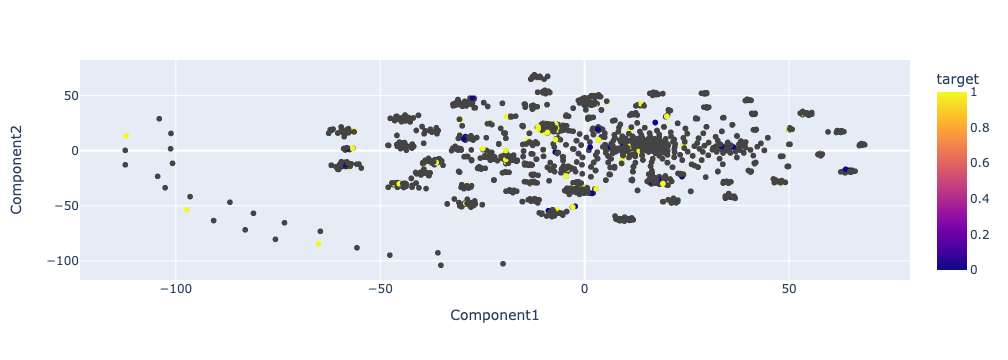

In [38]:
import plotly.express as px

graph = px.scatter(reduced_df, x="Component1", y="Component2", color = "target")
graph.show()

<img src="https://i.ibb.co/FXp5wC0/newplot-9.png" alt="newplot-9" width=700>

### 3.2. Data Exploration


#### 3.2.1 Top 20 Markets by Funding 
Total funding amount is very important because that seems to play a role in how successful the startup is, and markets also seem to play a part as it could be easier to succeed in one market than another due to the nature of a given market. Therefore, we wanted to visualize the top (most frequent) markets on the x-axis and their corresponding total funding amounts on the y-axis to see if there is a relationship between market type and funding amount. The figure below illustrates that the highest total funding is generally related to technology (i.e. software, biotechnology, clean technology, internet, and mobile). We also see that startups in the majority of these industries have a greater rate of success than failure (acquired > closed) besides the manufacturing industry. 

In [ ]:
import plotly.express as px
markets = df.groupby("market")

marketsbyfunding = markets["funding_total_usd"].sum().sort_values(ascending = False).head(20)

fig = px.bar(marketsbyfunding,
            labels = {
                "value": "Total Funding",
                "market": "Market"
            },
            title = "Top 10 Markets by Funding Amount")
fig.show()

<img src="https://i.ibb.co/LpjRqpF/newplot-8.png" alt="newplot-8" width =700>

#### 3.2.2 Debt Financing to Total Funding 
Understanding the type of financing a startup receives is also important in considering whether a startup will succeed because it’s a different way of funding compared to venture capital. Therefore we visualize debt financing on the x-axis and total funding amount on the y-axis to get an understanding of how much each startups total funding is made up of debt and if there is any correlation between these two and overall startup success. Note that an outlier of $5.7B was removed for better visualization. The scatter below suggests that startups with higher proportions of debt financing to total funding have a higher frequency of success. 

In [ ]:
df_no_outliers = df_n[df_n.funding_total_usd != 5700000000]
fig = px.scatter(df_no_outliers, x="debt_financing", y="funding_total_usd", color="status", title = "Debt Financing to Total Funding")
fig.update_layout(title_x = 0.5)
fig.show()

<img src="https://i.ibb.co/DMwZB9P/newplot-3.png" alt="newplot-3" width=1000>


#### 3.2.3 Matrix of Early Stage Funding
Start up funding occurs through a series of rounds, and often the successful early stage funding can indicate a startups overall ability to capture new opportunities and grow. We visualize a matrix of the early stage funding rounds to better understand how companies react to successful or unsuccessful funding rounds, and how that attributes to over all success. 
The figure below shows that startups with lower series A funding tend to have higher series C funding. The same is true for companies that experience low series B funding. 

In [ ]:
early_funding = df_n[['round_A', 'round_B','round_C']]
fig = px.scatter_matrix(df_n, dimensions = early_funding, color = "status", template ='ggplot2', title = "Matrix of Early Stage Funding",
                       labels={col:col.replace('_', ' ') for col in df.columns}, width = 400, height = 400)
fig.show()

<img src="https://i.ibb.co/1vyCS1d/newplot-6.png" alt="newplot-6" width = 400>

#### 3.2.4 Venture Funding vs Total Funding
Funding raised from venture capital is known to be one of largest portions of total startup funding. We visualize this with venture funding on the x-axis and total funding on the y-axis to further understand how these two features play into startup success. The figure below demonstrates a positve correlation between venture funding and start up funding and indicates that startups with higher quantities of venture funding tend to succeed over startups with relatively small venture funding. 

In [ ]:
#outlier total funding values
values = [5700000000, 466000000, 925000000]

#drop rows that contain any value in the outliers list, we do this here only for visualization purposes
df_no_outliers = df_n[df_n.funding_total_usd.isin(values) == False]
df_no_outliers = df_no_outliers[df_no_outliers.venture != 660200000]

fig = px.scatter(df_no_outliers, x = 'venture', y ='funding_total_usd', color = 'status', title = 'Venture Funding vs Total Funding',
                 labels = {"funding_total_usd" : "Total Funding", "venture" : "Venture Funding"})
fig.update_layout(title_x = 0.5)
fig.show()

<img src="https://i.ibb.co/YBGbWws/newplot-7.png" alt="newplot-7" width= 700>

### 3.3. Model Training
**TODO: For your machine learning question(s), use the Training, Validation, and Testing approach through GridSearch**



#### 3.3.1 RFE Feature Selection

We chose to use run RFE feature selection as not all features are likely to matter; we found that 15 features worked best. After running tests, a smaller feature set worked better than the original amount. We compare the performance of the algorithms using the selected and all features below. 

In [12]:
# function for codnucting RFE feature selection
def RFE_Selection(features, x_train, x_test, ytrain):
    feature_selection = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 15)

    feature_selection.fit(X_train_scaled, ytrain)

    X_train_selected = feature_selection.transform(X_train_scaled)
    X_test_selected = feature_selection.transform(X_test_scaled)
    
    selected_features = [feature for feature, status in zip(features, feature_selection.get_support()) if status == True]
    print('Selected startup features:')
    for feature in selected_features:
        print('\t' + feature)

    return X_train_selected, X_test_selected, selected_features

# get selected features
X_train_selected, X_test_selected, selected_features = RFE_Selection(features, X_train_scaled, X_test_scaled, y_train)

NameError: name 'features' is not defined

#### 3.3.2 Model training using RFE selected features

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Support Vector Machine': LinearSVC(max_iter=1000000),
    'Decision Tree': DecisionTreeClassifier()}

# with selected features
for estimator, estimator_object in estimators.items():
    #fit scaled sets to model
    model = estimator_object.fit(X=X_train_selected, y=y_train)

    print(estimator + ":")
    #prediction accuracy
    accuracy = model.score(X_train_selected, y_train)
    print("Prediction accuracy on the training data:", format(accuracy*100, ".2f"))
    accuracy = model.score(X_test_selected, y_test)
    print("Prediction accuracy on the test data:", format(accuracy*100, ".2f"), "\n")

#### 3.3.3 Model training without RFE selection
We note an improvement in model performance across all three algorithms when using RFE. This suggests that a smaller subset of our features is more representative of our outcome variable than all features.

In [ ]:
# with scaled features but not selected
for estimator, estimator_object in estimators.items():
    #fit scaled sets to model
    model = estimator_object.fit(X=X_train_scaled, y=y_train)
    
    print(estimator + ":")
    #prediction accuracy
    accuracy = model.score(X_train_scaled, y_train)
    print("Prediction accuracy on the training data:", format(accuracy*100, ".2f"))
    accuracy = model.score(X_test_scaled, y_test)
    print("Prediction accuracy on the test data:", format(accuracy*100, ".2f"), "\n")

#### 3.3.5 Overfitting vs Underfitting
Looking at the performance of the model above there is indication of overfitting. Regardless of the algorithm used, the model has high variance between the training and testing set performance, and high bias as indicated by relatively low training and validation scores. 

#### 3.3.6 Model performance with evaluation metrics
After looking at the prediction accuracy above, we conclude that kNN is the best algorithm to use in this scenario as it has the highest score on the test set and a relatively small difference between training and test data. Similarly, looking at the classifcation metrics below we see that kNN has the highest overall prediction, recall, and f1 score. The model has a greater recall than precision when predicting successful start ups, meaning the rate it correctly predicts successful startups out of all true successful startups is greater than the rate it correctly predicts successful startups out of correctly predicting both success and failure.  

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

for estimator, estimator_object in estimators.items():
    model = estimator_object.fit(X=X_train_selected, y=y_train)
    #make predictions on the test set
    predicted = model.predict(X=X_test_selected)

    expected = y_test
    
    class_report = classification_report(y_true=expected, y_pred=predicted)
    print(estimator, ":")
    print(class_report, "\n")

**NOTE:** GridSearch was done below in Model Optimization

### 3.4. Model Optimization
Below we leverage Grid Search to determine the most optimal parameters for kNN. The hyperparameter to be tuned in kNN is the number of neighbors. It is important to conduct hyperparameter tuning to ensure that our model is not overfit and too complex. Overfitting diminishes overall generalizability, hurting the models ability to give accurate predictions on new, unseen data. 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(n_neighbors=[1, 5, 10, 20, 50])

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy")

# fit the grid search object on the training data (CV will be performed on this)
grid_search.fit(X=X_train_selected, y=y_train)

# this is the best performance during training
print("Best cross-validation score: ", grid_search.best_score_)

# result of grid search
print("Best parameters: ", grid_search.best_params_)

print("Training set score with best parameters: ", grid_search.score(X_train_selected, y_train))

# the performance of the best found parameters on the test set
print("Test set score with best parameters: ", grid_search.score(X_test_selected, y_test))

### 3.5. Model Testing

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 20)
model = knn.fit(X=X_train_selected, y=y_train)

predicted = model.predict(X=X_test_selected)
expected = y_test

In [ ]:
accuracy = model.score(X_test_selected, y_test)
print("Final accuracy on testing set:", accuracy)

In [6]:
class_report = classification_report(y_true=expected, y_pred=predicted)
print(class_report)

NameError: name 'classification_report' is not defined

In [121]:
# summary of testing
class_report = classification_report(y_true=expected, y_pred=predicted, output_dict=True)
print("Precision:", class_report['macro avg']['precision'])
print("Recall:", class_report['macro avg']['recall'])
print("F1-Score:", class_report['macro avg']['f1-score'])
print("Support:", class_report['macro avg']['support'], "\n")

print("Final accuracy on testing set:", accuracy)

Precision: 0.6919965620102129
Recall: 0.6550949560955688
F1-Score: 0.6614819759679573
Support: 922 

Final accuracy on testing set: 0.7136659436008677


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

### 4.1 Findings
We compared three algorithms:
1. kNN
2. Linear SVC
3. Decision Tree

Of the three algorithms, the kNN algorithm had the best performance with a performance of  with the hyperparameter, n_neighbors, optimized to 20 based on the GridSearch. Therefore kNN (n_neighbors = 20) should be used for the predictive model. Based on our findings, the features we used to predict our outcome variable should not be used on their own given the model performance is still relatively low ~.713. Similarly, the precision and recall scores, and in turn the F1 score, have room for improvement to bring them closer to one and improve the models overall ability to correctly predict our target outcome. Support is simply the indication of actual occurrences in the training set and will not change between models. 

**NOTE: Interpretation of findings 3.3 and 3.4 were also detailed under each respective section.**


### 4.2 Ethical Implications
The results of this model should not be taken at face value. For example, in the RFE model, we may notice location bias as only certain locations were selected. Therefore, as we apply our model to new, unseen data from across the US, we may see a greater false positive rate for startups from the selected states. Similarly, the vast amounts of industries across the startup ecosystem are not represented in our current dataset. Introducing this model to new data may reveal higher false positive rates for startups in the tech space, the most frequently occurring industry in our dataset. The potential biases in this model have great implications. Specifically, if using this model from an investor standpoint, these biases may deter investors from providing capital to startups which actually have the means to succeed. While this concern is not as grave as other potential ML ethical implications, it is certainly an important consideration. Finally, the dataset used to train this model is dated relative to the quickly evolving nature of the startup ecosystem. This means that the model is trained on data that is not truly representative of the population and thus has a limited ability to provide accurate predictions. 



### 4.3 Future Work
Looking forward, there remain many opportunities to improve this project. First, more data and features need to be gathered. Specifically, globally data and other key variables such number of employees, founder background, management team, market size, market potential, etc).  Increasing the data and features used will help us determine which features are most representative of the outcome variable, hopefully improving the performance from what it is as we complete this report. Next, other algorithms/analysis can be tested such as Logistic Regression and Random Forest, and even Neural Networks to see if the model performance improves using an alternative approach. Finally, the approach to this project could change entirely to or used in tamdem with text classification to predict start up success through scraping data from social media platform such as Twitter.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS


The initial data cleaning and and data wrangling portions upto section 3.1 were done as a group via zoom screen share. After the data had been cleaned and wrangled, Shaun completed the remainder of the model training and testing. Terry completed visualizations and all write up sections of the report. Lauren was reponsible for editing of the completed report. 